In [1]:
## Data preparation

In [ ]:
price_url = "https://etherscan.io/chart/etherprice?output=csv"
market_capitalization_url = "https://etherscan.io/chart/marketcap?output=csv"
supply_growth_url = "https://etherscan.io/chart/ethersupplygrowth?output=csv"
daily_transactions_url = "https://etherscan.io/chart/tx?output=csv"
daily_token_transfer_url = "https://etherscan.io/chart/tokenerc-20txns?output=csv"
unique_address_url = "https://etherscan.io/chart/address?output=csv"
avg_block_size_url = "https://etherscan.io/chart/blocksize?output=csv"
avg_block_time_url = "https://etherscan.io/chart/blocktime?output=csv"
avg_gas_price_url = "https://etherscan.io/chart/gasprice?output=csv"
avg_gas_limit_url = "https://etherscan.io/chart/gaslimit?output=csv"
daily_gas_used_url = "https://etherscan.io/chart/gasused?output=csv"
daily_block_reward_url = "https://etherscan.io/chart/blockreward?output=csv"
block_count_rewards_url = "https://etherscan.io/chart/blocks?output=csv"
uncle_count_rewards_url = "https://etherscan.io/chart/uncles?output=csv"
net_hashrte_url = "https://etherscan.io/chart/hashrate?output=csv"
net_difficulty_url = "https://etherscan.io/chart/difficulty?output=csv"
pending_transactions_url = "https://etherscan.io/chart/pendingtx?output=csv"
net_transaction_fee_url = "https://etherscan.io/chart/transactionfee?output=csv"
net_utilization_url = "https://etherscan.io/chart/networkutilization?output=csv"
daily_verified_contracts_url = "https://etherscan.io/chart/verified-contracts?output=csv"

In [2]:
import pandas as pd
from urllib.request import Request, urlopen

def read_data(url):
  req = Request(url)
  req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
  content = urlopen(req)

  return pd.read_csv(content)

In [ ]:
url_list = [
              ("price", price_url),
              ("market cap.", market_capitalization_url),
              ("supply growth", supply_growth_url),
              ("daily trans.", daily_transactions_url),
              ("daily token trans.", daily_token_transfer_url),
              ("uniq. address", unique_address_url),
              ("avg blk size", avg_block_size_url),
              ("avg blk time", avg_block_time_url),
              ("avg gas price", avg_gas_price_url),
              ("avg gas limit", avg_gas_limit_url),
              ("daily gas used", daily_gas_used_url),
              ("daily blk reward", daily_block_reward_url),
              ("blk count reward", block_count_rewards_url),
              ("uncle count reward", uncle_count_rewards_url),
              ("net hashrte", net_hashrte_url),
              ("net diff.", net_difficulty_url),
              # ("pending trans.", pending_transactions_url),
              ("net trans. fee", net_transaction_fee_url),
              ("net util.", net_utilization_url),
              # ("daily verified contracts", daily_verified_contracts_url),
]

df_list = []
for column_name, url in url_list:
  df = read_data(url)
  df["Date(UTC)"] = pd.to_datetime(df["Date(UTC)"]).dt.strftime('%m/%d/%Y')

  if "UnixTimeStamp" in df.columns:
    df = df.drop("UnixTimeStamp", 1)
    
  if "Value" in df.columns:
    df = df.rename(columns={"Value": column_name})

  df_list.append(df)

In [ ]:
from functools import reduce

df_total = reduce(lambda df1, df2: pd.merge(df1, df2, on='Date(UTC)'), df_list)
df_total = df_total.rename(columns={"Value (Wei)": "avg gas price"})
df_total

,Date(UTC),price,Supply,MarketCap,Price,supply growth,daily trans.,No. of ERC20 Token Transfers,uniq. address,avg blk size,avg blk time,avg gas price,avg gas limit,daily gas used,daily blk reward,blk count reward,uncle count reward,net hashrte,net diff.,net trans. fee,net util.,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,Day 31
0,07/30/2015,0.00,7.204931e+07,0.000000,0.00,7.204931e+07,8893,0,9205,644,4.46,0,0,0,39316.09375,6912,1299,11.5297,0.121,0,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,07/31/2015,0.00,7.208550e+07,0.000000,0.00,7.208550e+07,0,0,9361,582,12.58,0,0,0,36191.71875,6863,511,51.4594,0.603,0,0.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,08/01/2015,0.00,7.211320e+07,0.000000,0.00,7.211320e+07,0,0,9476,575,16.34,0,0,0,27705.93750,5293,334,57.7845,0.887,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,08/02/2015,0.00,7.214143e+07,0.000000,0.00,7.214143e+07,0,0,9563,581,16.12,0,0,0,28223.43750,5358,394,67.9224,1.020,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,08/03/2015,0.00,7.216940e+07,0.000000,0.00,7.216940e+07,0,0,9639,587,16.37,0,0,0,27976.71875,5280,443,74.5737,1.126,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,10/09/2020,365.41,1.129408e+08,41269.687896,365.41,1.129408e+08,1049571,920272,117574906,37292,13.41,80387358281,12453527,77357297734,13342.37500,6378,342,257731.4794,3313.690,5752785534866861518614,0.9741,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899,10/10/2020,370.88,1.129543e+08,41892.488339,370.88,1.129543e+08,1036351,891639,117739687,35619,13.13,64197264627,12466925,76569429799,13520.31250,6509,293,262559.7762,3335.073,4494541295798936979940,0.9436,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1900,10/11/2020,374.40,1.129680e+08,42295.205336,374.40,1.129680e+08,1004701,887063,117980843,35265,12.97,49653860265,12467821,79786775919,13669.56250,6569,313,260752.4476,3273.614,3585365603350568699498,0.9743,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1901,10/12/2020,386.91,1.129815e+08,43713.660207,386.91,1.129815e+08,1092162,942638,118137338,38657,13.17,76063541206,12469822,78295187648,13506.12500,6457,354,259780.9543,3295.415,5515120626498358226212,0.9724,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1903 entries, 0 to 1902
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date(UTC)                     1903 non-null   object 
 1   price                         1903 non-null   float64
 2   Supply                        1903 non-null   float64
 3   MarketCap                     1903 non-null   float64
 4   Price                         1903 non-null   object 
 5   supply growth                 1903 non-null   float64
 6   daily trans.                  1903 non-null   int64  
 7   No. of ERC20 Token Transfers  1903 non-null   int64  
 8   uniq. address                 1903 non-null   int64  
 9   avg blk size                  1903 non-null   int64  
 10  avg blk time                  1903 non-null   float64
 11  avg gas price                 1903 non-null   int64  
 12  avg gas limit                 1903 non-null   int64  
 13  dai

In [3]:
# df_total.to_csv("drive/My Drive/Colab Notebooks/etheruem_data.csv")
df_total = pd.read_csv("drive/My Drive/Colab Notebooks/etheruem_data.csv")
df_total = df_total.drop("Unnamed: 0", 1)
df_total

,Date(UTC),price,Supply,MarketCap,Price,supply growth,daily trans.,No. of ERC20 Token Transfers,uniq. address,avg blk size,avg blk time,avg gas price,avg gas limit,daily gas used,daily blk reward,blk count reward,uncle count reward,net hashrte,net diff.,net trans. fee,net util.
0,07/30/2015,0.00,7.204931e+07,0.000000,0.00,7.204931e+07,8893,0,9205,644,4.46,0,0,0,39316.09375,6912,1299,11.5297,0.121,0,0.0000
1,07/31/2015,0.00,7.208550e+07,0.000000,0.00,7.208550e+07,0,0,9361,582,12.58,0,0,0,36191.71875,6863,511,51.4594,0.603,0,0.0000
2,08/01/2015,0.00,7.211320e+07,0.000000,0.00,7.211320e+07,0,0,9476,575,16.34,0,0,0,27705.93750,5293,334,57.7845,0.887,0,0.0000
3,08/02/2015,0.00,7.214143e+07,0.000000,0.00,7.214143e+07,0,0,9563,581,16.12,0,0,0,28223.43750,5358,394,67.9224,1.020,0,0.0000
4,08/03/2015,0.00,7.216940e+07,0.000000,0.00,7.216940e+07,0,0,9639,587,16.37,0,0,0,27976.71875,5280,443,74.5737,1.126,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,10/09/2020,365.41,1.129408e+08,41269.687896,365.41,1.129408e+08,1049571,920272,117574906,37292,13.41,80387358281,12453527,77357297734,13342.37500,6378,342,257731.4794,3313.690,5752785534866861518614,0.9741
1899,10/10/2020,370.88,1.129543e+08,41892.488339,370.88,1.129543e+08,1036351,891639,117739687,35619,13.13,64197264627,12466925,76569429799,13520.31250,6509,293,262559.7762,3335.073,4494541295798936979940,0.9436
1900,10/11/2020,374.40,1.129680e+08,42295.205336,374.40,1.129680e+08,1004701,887063,117980843,35265,12.97,49653860265,12467821,79786775919,13669.56250,6569,313,260752.4476,3273.614,3585365603350568699498,0.9743
1901,10/12/2020,386.91,1.129815e+08,43713.660207,386.91,1.129815e+08,1092162,942638,118137338,38657,13.17,76063541206,12469822,78295187648,13506.12500,6457,354,259780.9543,3295.415,5515120626498358226212,0.9724


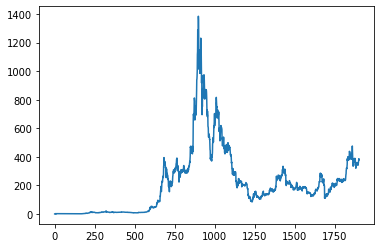

In [4]:
import matplotlib.pyplot as plt

df_total["price"].plot()
plt.show()

In [5]:
## Data preprocessing

In [6]:
import tensorflow as tf

# df_months = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%m').astype("int16")
# df_days = pd.to_datetime(df_total["Date(UTC)"]).dt.strftime('%d').astype("int16")
# months = pd.DataFrame(tf.keras.utils.to_categorical(df_months)[:, 1:], columns=["Month "+str(i) for i in range(1, 13)]).astype("int")
# days = pd.DataFrame(tf.keras.utils.to_categorical(df_days)[:, 1:], columns=["Day "+str(i) for i in range(1, 32)]).astype("int")
# df_total = pd.concat([df_total, months, days], axis=1)
# df_total

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

series = df_total[[column for column in df_total.columns if column not in ["Date(UTC)"]]]
series = series.applymap(lambda value: value.replace(",", "") if type(value) is str else value)
series = series.to_numpy()
scaler = MinMaxScaler()
series = scaler.fit_transform(series)

In [59]:
split_time = 1500

time = np.array(df_total.index)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 90
batch_size = 512
shuffle_buffer_size = 1000

In [60]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1][0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

In [61]:
tf.keras.backend.clear_session()

train_set = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [62]:
## Training model

In [236]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), batch_input_shape=[None, window_size, series.shape[1]]),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_1"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(filters=32, kernel_size=3), name="Conv1d_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2), name="maxpool_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2), name="dropout_2"),
  # tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten(), name="flatten"),
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding="causal", activation="relu", input_shape=[None, series.shape[1]]),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="causal", activation="relu"),
  # tf.keras.layers.MaxPool1D(pool_size=2),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1),
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr = 0.1
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr * np.power(0.6, np.floor((1 + epoch)/20)))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="mae", patience=5, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(lr=lr)
# optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.9)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

history = model.fit(train_set, epochs=200, callbacks=[
                                                      lr_schedule, 
                                                      # early_stopping,
                                                      ])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, None, 128)         7808      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, None, 64)          24640     
_________________________________________________________________
bidirectional_49 (Bidirectio (None, None, 256)         197632    
_________________________________________________________________
bidirectional_50 (Bidirectio (None, None, 256)         394240    
_________________________________________________________________
bidirectional_51 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 1)               

KeyboardInterrupt: ignored

In [ ]:
plt.plot(np.arange(200), 0.1*np.power(0.6, np.floor((1 + np.arange(200))/20)))

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.show()

In [ ]:
# optimizer = tf.keras.optimizers.SGD(lr=5e-4, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# history = model.fit(train_set, epochs=400)

In [ ]:
def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

In [ ]:
# scaler2 = MinMaxScaler()
# scaler2.data_max_ = scaler.data_max_[0]
# scaler2.data_min_ = scaler.data_min_[0]
# scaler2.min_ = scaler.min_[0]
# scaler2.scale_ = scaler.scale_[0]

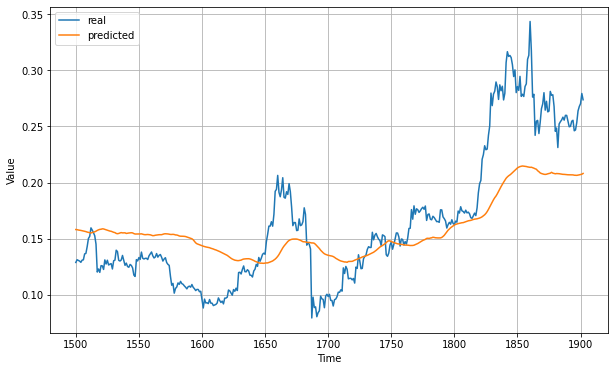

In [227]:
forecast=[]
for time in range(len(series) - window_size):
  pred = model.predict(series[time:time + window_size][np.newaxis])
  # rescaled_pred = scaler2.inverse_transform(pred)
  # pred = pred / 100.
  forecast.append(pred)

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid[:, 0], "real")
plot_series(time_valid, results, "predicted")

In [228]:
tf.keras.metrics.mean_absolute_error(x_valid[:, 0], results).numpy()

0.032669377

In [72]:
## Test phase

In [ ]:
model.predict(series[-window_size:][np.newaxis])[0, 0] - model.predict(series[-window_size-1:-1][np.newaxis])[0, 0]

0.0011415184

In [ ]:
scaler2 = MinMaxScaler()
scaler2.min_ = scaler.min_[0]
scaler2.scale_ = scaler.scale_[0]
print(scaler2.inverse_transform(model.predict(series[-window_size-1:-1][np.newaxis]))[0, 0])
print(scaler2.inverse_transform(model.predict(series[-window_size:][np.newaxis]))[0, 0])

366.3563
367.93732
